In [4]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks (1)/ML_Class/datakelulusanmahasiswa.csv'
df = pd.read_csv(file_path)

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,PEREMPUAN,BEKERJA,28,BELUM MENIKAH,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,TERLAMBAT
1,DWI HESTYNA PRIHASTANTY,PEREMPUAN,MAHASISWA,32,BELUM MENIKAH,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,TERLAMBAT
2,MURYA ARIEF BASUKI,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,TERLAMBAT
3,NANIK SUSANTI,PEREMPUAN,MAHASISWA,27,BELUM MENIKAH,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,TERLAMBAT
4,RIFKA ISTIQFARINA,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,TERLAMBAT


In [12]:
df.info()
df.describe()
df.isnull().sum()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAMA              379 non-null    object 
 1   JENIS KELAMIN     379 non-null    object 
 2   STATUS MAHASISWA  379 non-null    object 
 3   UMUR              379 non-null    int64  
 4   STATUS NIKAH      379 non-null    object 
 5   IPS 1             379 non-null    float64
 6   IPS 2             379 non-null    float64
 7   IPS 3             379 non-null    float64
 8   IPS 4             379 non-null    float64
 9   IPS 5             379 non-null    float64
 10  IPS 6             379 non-null    float64
 11  IPS 7             379 non-null    float64
 12  IPS 8             372 non-null    float64
 13  IPK               376 non-null    float64
 14  STATUS KELULUSAN  379 non-null    object 
dtypes: float64(9), int64(1), object(5)
memory usage: 44.5+ KB


Index(['NAMA', 'JENIS KELAMIN', 'STATUS MAHASISWA', 'UMUR', 'STATUS NIKAH',
       'IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8',
       'IPK ', 'STATUS KELULUSAN'],
      dtype='object')

In [13]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

categorical_cols = df_encoded.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

df_encoded.head()


,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,47,1,0,28,0,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,1
1,101,1,1,32,0,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,1
2,246,1,0,29,0,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,1
3,253,1,1,27,0,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,1
4,295,1,0,29,0,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,1


In [16]:
# IMPUTASI MISSING VALUE (FIX)
from sklearn.impute import SimpleImputer
import numpy as np

# Semua kolom sudah numerik setelah LabelEncoder
all_num_cols = df_encoded.columns

# Imputer numerik (median)
imputer = SimpleImputer(strategy='median')
df_encoded[all_num_cols] = imputer.fit_transform(df_encoded[all_num_cols])

df_encoded.isnull().sum()


,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
STATUS NIKAH,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0


In [17]:
X = df_encoded.drop('STATUS KELULUSAN', axis=1)
y = df_encoded['STATUS KELULUSAN']

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [19]:
from sklearn.svm import SVC

# SVM Linear
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

# SVM RBF
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)


SVC()

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prediksi SVM Linear
pred_linear = svm_linear.predict(X_test)

print("=== SVM Linear ===")
print("Akurasi:", accuracy_score(y_test, pred_linear))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, pred_linear))
print("\nClassification Report:\n", classification_report(y_test, pred_linear))


# Prediksi SVM RBF
pred_rbf = svm_rbf.predict(X_test)

print("=== SVM RBF ===")
print("Akurasi:", accuracy_score(y_test, pred_rbf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, pred_rbf))
print("\nClassification Report:\n", classification_report(y_test, pred_rbf))


=== SVM Linear ===
Akurasi: 0.8289473684210527

Confusion Matrix:
 [[36  1]
 [12 27]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.97      0.85        37
         1.0       0.96      0.69      0.81        39

    accuracy                           0.83        76
   macro avg       0.86      0.83      0.83        76
weighted avg       0.86      0.83      0.83        76

=== SVM RBF ===
Akurasi: 0.8157894736842105

Confusion Matrix:
 [[35  2]
 [12 27]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.95      0.83        37
         1.0       0.93      0.69      0.79        39

    accuracy                           0.82        76
   macro avg       0.84      0.82      0.81        76
weighted avg       0.84      0.82      0.81        76



In [21]:
params_C = [0.1, 1, 10]
params_gamma = ['scale', 0.1, 1]

print("=== Hyperparameter Tuning RBF ===")
for C in params_C:
    for gamma in params_gamma:
        model = SVC(kernel='rbf', C=C, gamma=gamma)
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        print(f"C={C}, gamma={gamma}, akurasi={accuracy_score(y_test, pred)}")


=== Hyperparameter Tuning RBF ===
C=0.1, gamma=scale, akurasi=0.8289473684210527
C=0.1, gamma=0.1, akurasi=0.8289473684210527
C=0.1, gamma=1, akurasi=0.4868421052631579
C=1, gamma=scale, akurasi=0.8157894736842105
C=1, gamma=0.1, akurasi=0.8421052631578947
C=1, gamma=1, akurasi=0.5394736842105263
C=10, gamma=scale, akurasi=0.868421052631579
C=10, gamma=0.1, akurasi=0.8552631578947368
C=10, gamma=1, akurasi=0.5921052631578947


In [22]:
def predict_status(data_list):
    """
    data_list harus sesuai urutan kolom X
    Contoh:
    [UMUR, IPS1, IPS2, ..., STATUS MAHASISWA, STATUS NIKAH, JENIS KELAMIN, dll]
    """
    data_scaled = scaler.transform([data_list])
    pred = svm_rbf.predict(data_scaled)

    return "LULUS" if pred[0] == 1 else "TIDAK LULUS"

# Contoh prediksi baris pertama dataset
predict_status(list(X.iloc[0]))


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'LULUS'

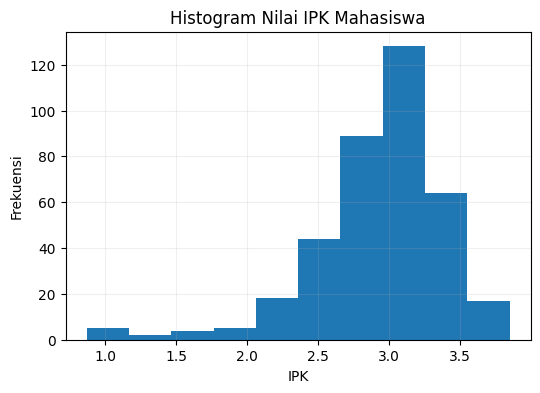

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(df['IPK '], bins=10)
plt.title("Histogram Nilai IPK Mahasiswa")
plt.xlabel("IPK")
plt.ylabel("Frekuensi")
plt.grid(True, alpha=0.2)
plt.show()


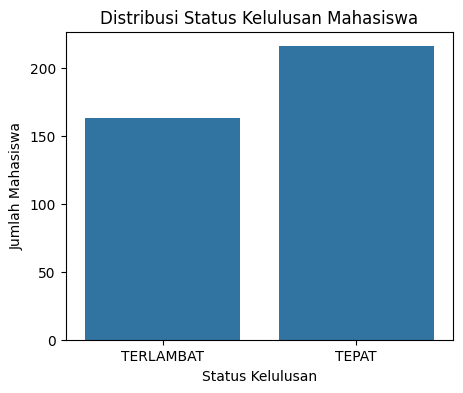

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.countplot(data=df, x='STATUS KELULUSAN')
plt.title("Distribusi Status Kelulusan Mahasiswa")
plt.xlabel("Status Kelulusan")
plt.ylabel("Jumlah Mahasiswa")
plt.show()


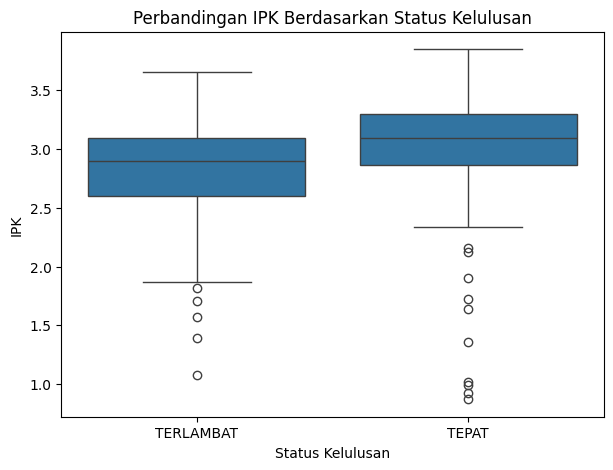

In [27]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='STATUS KELULUSAN', y='IPK ')
plt.title("Perbandingan IPK Berdasarkan Status Kelulusan")
plt.xlabel("Status Kelulusan")
plt.ylabel("IPK")
plt.show()
